<a href="https://colab.research.google.com/github/Shahabshms/Numerical_Methods_for_ML_and_AI_Solution_2/blob/main/_4301_HW2_Q3_b_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3: Convex Envelopes

To fix the unboundedness, we can add an additional constraint that $\Vert w\Vert_2^2 \leq \gamma^2$ for some given $\gamma \geq 0$. In Python, implement projected gradient descent to solve the optimization problem under this additional constraint. Your Python function should take as input the $x$’s, the $y$’s, $\gamma$, the query point $x$, and the number of iterations of projected gradient
ascent to perform and return the best function value found during the iterative procedure stating from $w = 0$ and $y = \text{min}_m y^{(m)}$. 

Hint: you can do the projection analytically if
you reformulate the optimization problem to eliminate the linear constraints.

**How to do the projection analytically:**

The question is asking to add the constraint of $\Vert w\Vert^2_2\leq \gamma^2$ to the optimization problem. This constraint is equivalent to projecting vector $w$ into an n-dimensional sphere of the radius $\gamma$ at the origin. So, the projection is as easy as the following:
\begin{align}
w^{\text{prj}} = \gamma\frac{w}{\Vert w\Vert_2}
\end{align}

I recommend you try different $\gamma$ to see how it impacts the final result. 

In [ ]:
def projection(weight,gamma):
  len_of_w = np.linalg.norm(weight,2)
  if len_of_w > gamma:
    weight = gamma * (weight / len_of_w)
  return weight

There is nothing special about the projected gradient descent of this problem.

In [ ]:
def gradient_descent(initial_weight,max_iterations,gamma,query):
  weight = initial_weight
  
  for iteration in range(1,max_iterations+1):
    step_size = 2 / (iteration+2)
    gradient = get_gradient(weight,query)
    weight = weight - step_size * gradient
    weight = projection(weight,gamma)

  return weight



**How to get the gradient:**
The orinigal problem is
\begin{align}
f_{\text{env}} = \sup_{w\in\mathbb{R}^n,y\in\mathbb{R}} y
\end{align}
such that
\begin{align}
y^{(m)} \geq y + w^T(x^{(m)}-x) &\text{ for all } m\in\{1,\dots,M\},\\
\Vert w\Vert_2^2 &\leq \gamma^2.
\end{align}

First we need to eliminate $y$. Since this is a constrained convex problem, we know that the answer lies on the boundry. So
\begin{align}
y = \min_{m} y^{(m)} - w^T(x^{(m)}-x).
\end{align}
Now define
\begin{align}
g(w) \triangleq \min_{m} y^{(m)} - w^T(x^{(m)}-x).
\end{align}
Using $g(w)$ rewrite the main problem as
\begin{align}
f_{\text{env}} = \sup_{w\in\mathbb{R}^n} g(w)
\end{align}
such that
\begin{align}
\Vert w\Vert_2^2 \leq \gamma^2.
\end{align}
From now, there is no need have $y$ as a variable anymore. We just need to calculate $y$ at the very end. So the gradient of the objective function, with respect to its only variable $w$ is
\begin{align}
\nabla_w g(w) = -(x^{(m^*)}-x),
\end{align}
where 
\begin{align}
m^* = \text{argmin}_{m} y^{(m)} - w^T(x^{(m)}-x).
\end{align}

In [ ]:
def get_gradient(weight,query):
# There might be more that one m_star. Which means that we need to get the subgradient.
# This is an acceptable answer. But there might be other acceptable answers as well. 
  m_star = arg_min(weight,query)[0] 
  gradient = -(x[m_star] - query)

  return gradient

In [ ]:
def arg_min(weight,query):

  arr = [y[j] - np.matmul(query - x[j] , weight) for j in range(m)]
  m_star = [j for j in range(len(arr)) if arr[j] == min(arr)]

  return m_star


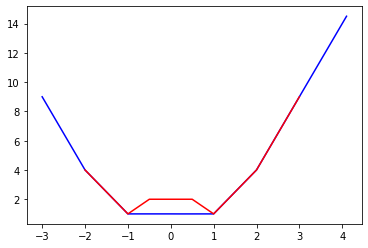

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


gamma = 5

max_iterations = 1000

x = np.array([[-1],[-0.5],[0.5],[1],[2],[3],[-2]])
y = np.array([[1],[2],[2],[1],[4],[9],[4]])

m = x.shape[0] # number of data points
n = x.shape[1] # dimension

initial_weight = np.zeros(n)

query = np.array([-2,-1,0,0.5,1,2,3,-3,-2.5,-1.5,0.2,2.9,4.1])
f_env = np.zeros(query.shape[0])

for i in range(query.shape[0]):
  w_i = gradient_descent(initial_weight,max_iterations,gamma,query[i])
  f_env[i] = min([y[j] - np.matmul(query[i] - x[j],w_i) for j in range(m)])

given = sorted( [[x[i],y[i]] for i in range(m)] , key = lambda  p:p[0])
query = sorted( [[query[i],f_env[i]] for i in range(query.shape[0])], key = lambda  p:p[0])


plt.plot([query[i][0] for i in range(len(query))],[query[i][1] for i in range(len(query))],'b')
plt.plot([given[i][0] for i in range(len(given))],[given[i][1] for i in range(len(given))],'r')
